In [9]:
import urllib.parse
from urllib.request import urlopen
import requests
import lxml.html
import pandas as pd
import re
import os
from wordcloud import WordCloud
from bs4 import BeautifulSoup

In [71]:
txt = []

hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')

for i in range(10000):
    tmp1 = f'https://kin.naver.com/search/list.nhn?query=%EC%BD%94%EB%A1%9C%EB%82%98&page={i}'
    openurl = urlopen(tmp1)
    soup = BeautifulSoup(openurl,'html.parser')
    tmp = soup.find_all('a', class_="_nclicks:kin.txt _searchListTitleAnchor")

    for tag in tmp:
        try:
            url = str(tag).split(' ')[4:]
            for j in url:
                result = hangul.sub('', j)
                txt.append(result)
        except:
            pass

HTTPError: HTTP Error 403: Forbidden

In [82]:
word_dict = {}
for each_word in txt:
    if each_word not in word_dict.keys():
        word_dict[each_word] = 1
    else:
        word_dict[each_word] += 1
    

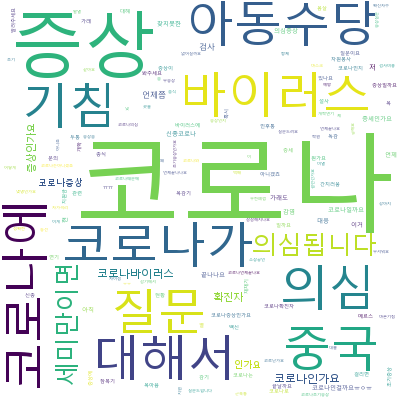

In [85]:
wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf', width=400, height=400, background_color='white')
wc.fit_words(word_dict)
wc.to_image()